#It is recommended to run this on GPU memory.

In [5]:
#@title Setup
from google.colab import output

nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
  warning_string = f"--> GPU check: ONLY {gpu_memory} MiB available: Please use low quality or low res <--"
  print(warning_string)
  output.eval_js('alert("Warning - low GPU (see message)")')
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

from IPython.utils import io
with io.capture_output() as captured: 
   #1.9.0+cu102
  !pip install torch==2.0.0a0+git5a54537 torchtext==0.10.0 torchvision==0.10.0+cu102 torch-optimizer==0.1.0 -f https://download.pytorch.org/whl/torch/ -f https://download.pytorch.org/whl/torchvision/
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/mfrashad/clipit.git
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia==0.6.1
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !pip install gradio==2.3.7

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  
  !mkdir -p steps
  !mkdir -p models

output.clear()
import sys
sys.path.append("clipit")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

After successfully running the below code click on the External Link

In [1]:
import gradio as gr
import torch
import clipit

# Define the main function
def generate(prompt, quality, style, aspect):
    torch.cuda.empty_cache()
    clipit.reset_settings()
    
    use_pixeldraw = (style == 'pixel art')
    use_clipdraw = (style == 'painting')
    clipit.add_settings(prompts=prompt,
                        aspect=aspect,
                        quality=quality,
                        use_pixeldraw=use_pixeldraw,
                        use_clipdraw=use_clipdraw,
                        make_video=True)
  
    settings = clipit.apply_settings()
    clipit.do_init(settings)
    clipit.do_run(settings)

    return 'output.png', 'output.mp4'

# Create the UI
prompt = gr.inputs.Textbox(default="Write Here", label="Text Prompt")
quality = gr.inputs.Radio(choices=['draft', 'normal', 'better'], label="Quality")
style = gr.inputs.Radio(choices=['image', 'painting','pixel art'], label="Type")
aspect = gr.inputs.Radio(choices=['square', 'widescreen','portrait'], label="Size")

# Launch the demo
iface = gr.Interface(generate, inputs=[prompt, quality, style, aspect], outputs=['image', 'video'], enable_queue=True, live=False)
iface.launch(debug=True)

IMPORTANT: You are using gradio version 2.3.7, however version 3.14.0 is available, please upgrade.
--------
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://cad1c827d0e2119e.gradio.app
Interface loading below...


ERROR:gradio.networking:Exception on /api/predict/ [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask_cors/extension.py", line 165, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/usr/local/lib/python3.10/dist-packages/gradio/networking.py", line 90, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-

KeyboardInterrupt: ignored

**IF (ModuleNotFoundError: No module named 'torch._six') occur follow this.**

Click on this link

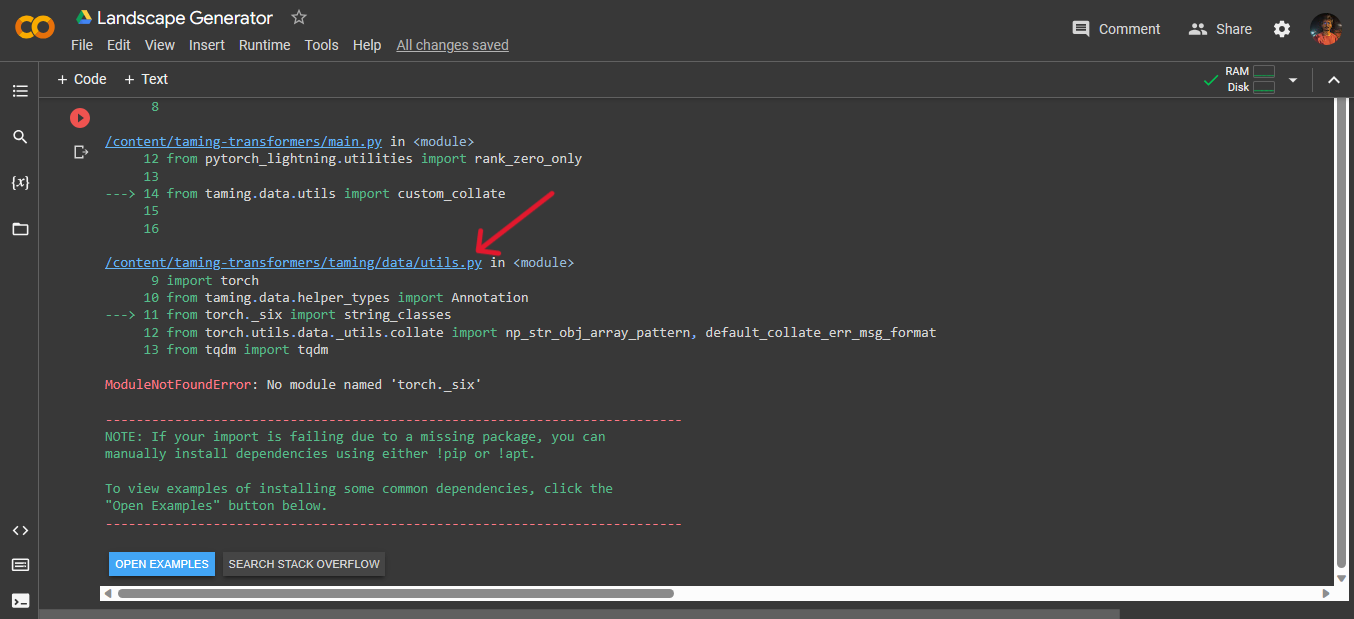

Then remove the highlited code from the Utils.py file.

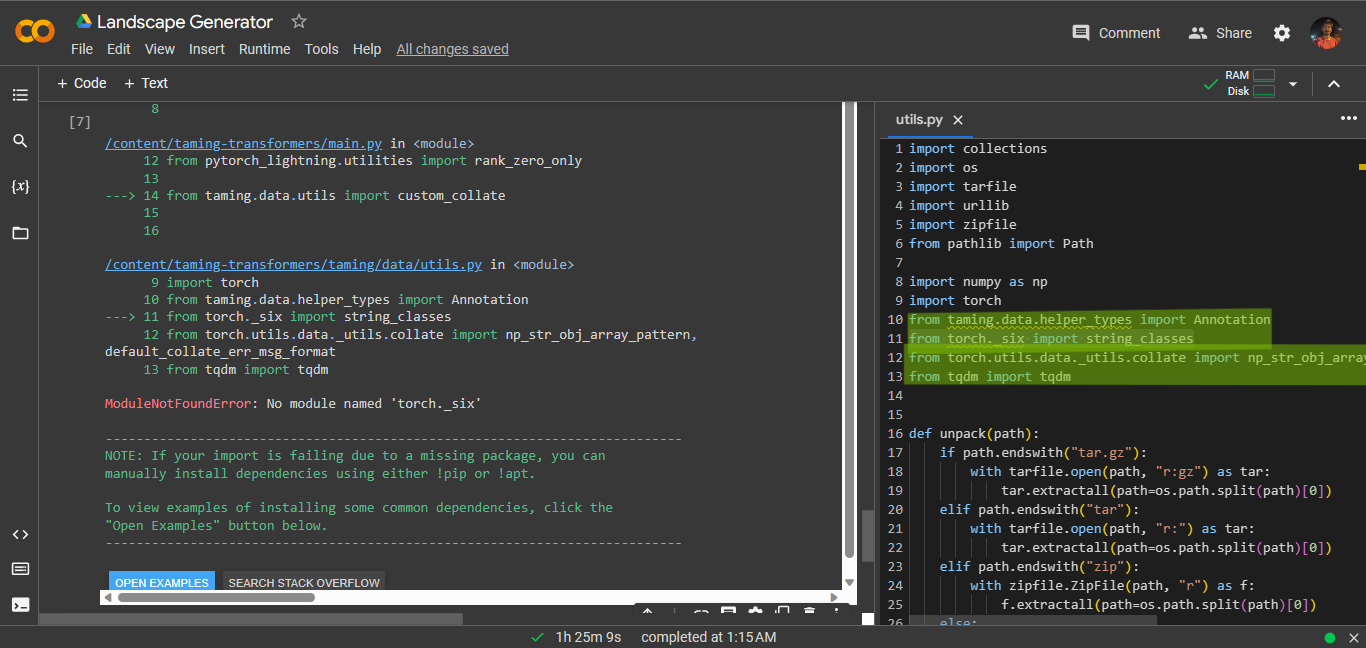

Re-run the cell again.

**We can personalised the required visual art with following keywords**

400+ Keywords 

[https://imgur.com/a/SALxbQm](https://)

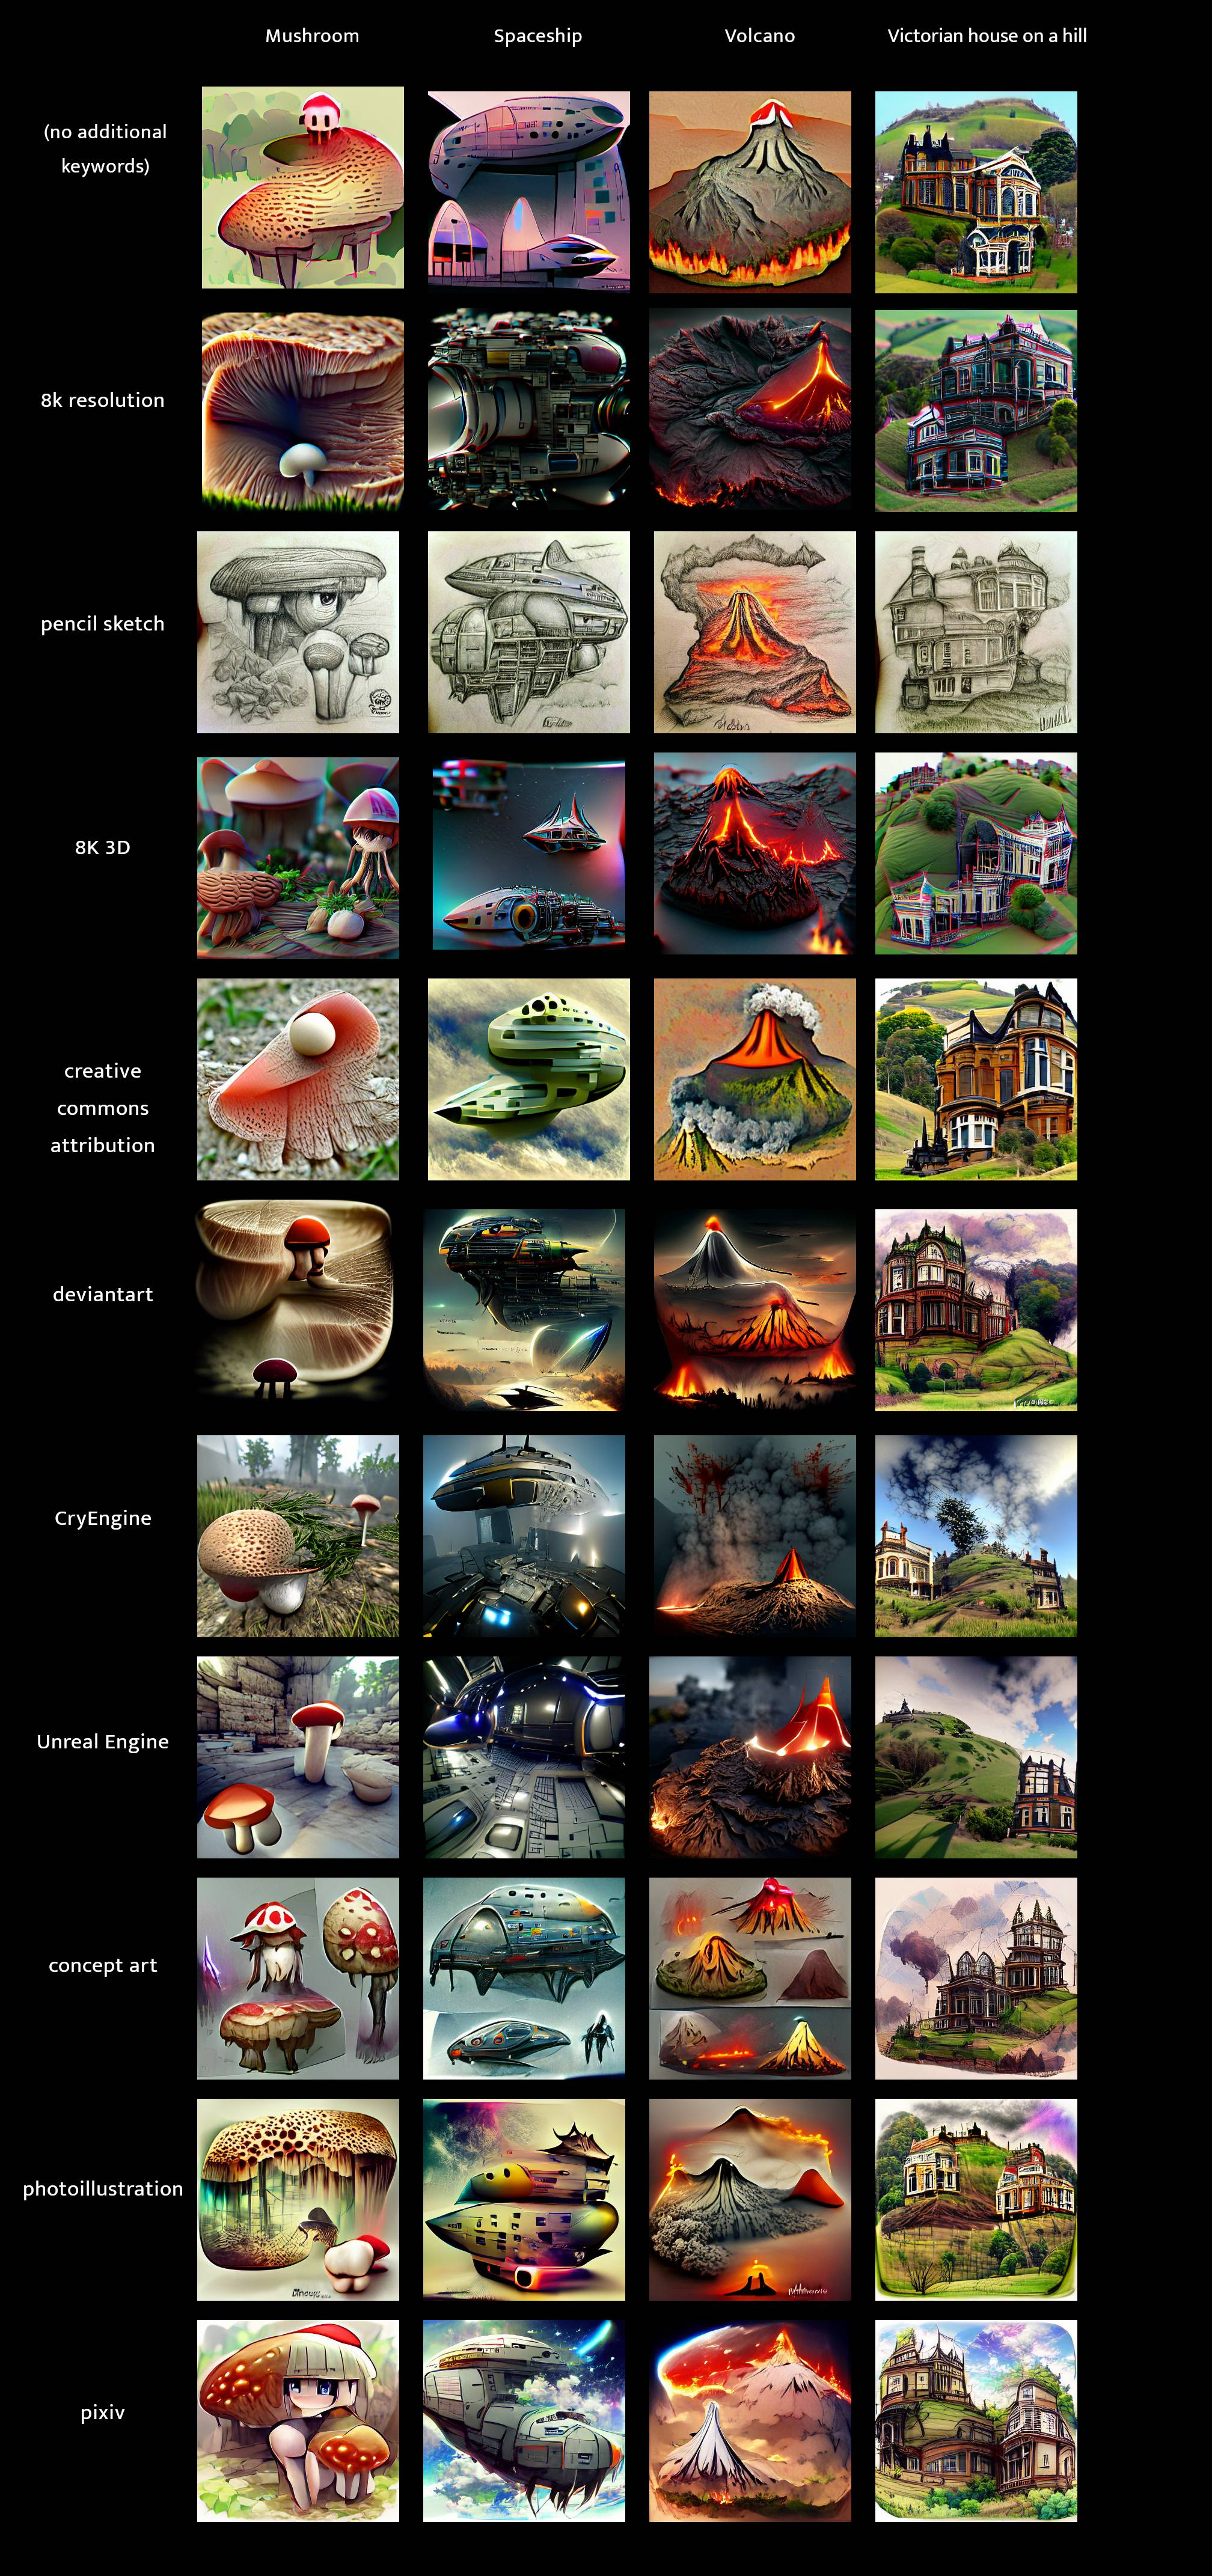